# Assignment 9: Optimization Algorithms and Convolution Neural Networks (deadline: 13 Jan, 23:59)

For theoretical tasks you are encouraged to write in $\\LaTeX$. Jupyter notebooks support them by default. For reference, please have a look at the examples in this short excellent guide: [Typesetting Equations](http://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Notebook/Typesetting%20Equations.ipynb)

Alternatively, you can upload the solutions in the written form as images and paste them inside the cells. But if you do this, **make sure** that the images are of high quality, so that we can read them without any problems.

### Exercise 1. Visualizing Optimization Algorithms in Deep Neural Networks (6 points)

**Goal:** Study applying optimization algorithms to an Error Surface.

In this task, we will get familiar with various optimization methods such as *Vanilla Gradient Descent (GD), [Gradient Descent with Momentum](https://www.tensorflow.org/api_docs/python/tf/train/MomentumOptimizer), [RMSProp](https://www.tensorflow.org/api_docs/python/tf/train/RMSPropOptimizer) and [AdaGrad](https://www.tensorflow.org/api_docs/python/tf/train/AdagradOptimizer)* by implementing them in TensorFlow and *visualizing* the path (convergence) towards minima using [Matplotlib 3D/Contour plots](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html).

In [1]:
# imports
import math
import random
import numpy as np
import tensorflow as tf
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['figure.figsize'] = (12.0, 8.0)

**3D Error Surface**

The 3D error surface `z` that we will use for visualizing the behaviour of different optimization methods is defined as:

$$ term1 = \frac{2}{\sqrt{(2\pi \sigma_{1}^{2})^{2}}} * \exp{\left(- \left[ \frac{(x-\mu_1)^2}{(\frac{\sigma_{1}}{2})^2} + \frac{(y-\mu_1)^2}{(\sigma_1)^2}     \right] \right)} $$

$$ term2 = \frac{1}{\sqrt{(2\pi \sigma_{2}^{2})^{2}}} * \exp{\left(- \left[ \frac{(x-\mu_2)^2 + (y-\mu_2)^2}{(\sigma_2)^2} \right] \right)} $$

$$ term3 = \frac{1}{20} * \left(x^2  + xy + y^2 \right) $$ <br>

$$ z = term1 - term2 + term3 $$

a) To make yourself comfortable working with this function and to get a good visualization of how this function looks like, implement the function (you can use $\color{blue}{NumPy}$) below at `# TODO`. This function will be plotted using [matplotlib-3D-wireframe](https://matplotlib.org/devdocs/gallery/mplot3d/wire3d.html) using the code and parameter values provided. (**1 point**)

In [2]:
# params of our error surface `z`
sigma_1 = 1.0
sigma_2 = 2.0
mu_1 = 0.5
mu_2 = 0.0
range_x, range_y = np.arange(-2.0, 3.0, 0.5), np.arange(-2.0, 2.0, 0.5)

def func_z(X, Y):
    """
    function definition of our 3D error surface
    """
    PI = math.pi
    term1 = (2 / (math.sqrt((2 * PI * sigma_1**2)**2))) * np.exp(-(((X - mu_1)**2 / (sigma_1 / 2)**2) + ((Y - mu_1)**2 / (sigma_1)**2)))
    term2 = (1 / (math.sqrt((2 * PI * sigma_2**2)**2))) * np.exp(-(((X - mu_2)**2 / (sigma_2)**2) + ((Y - mu_2)**2 / (sigma_2)**2)))
    term3 = (1 / 20) * (X**2 + (X * Y) + Y**2)
    # TODO Implement the 3D Error Surface described above
    z = term1 - term2 + term3
    return z

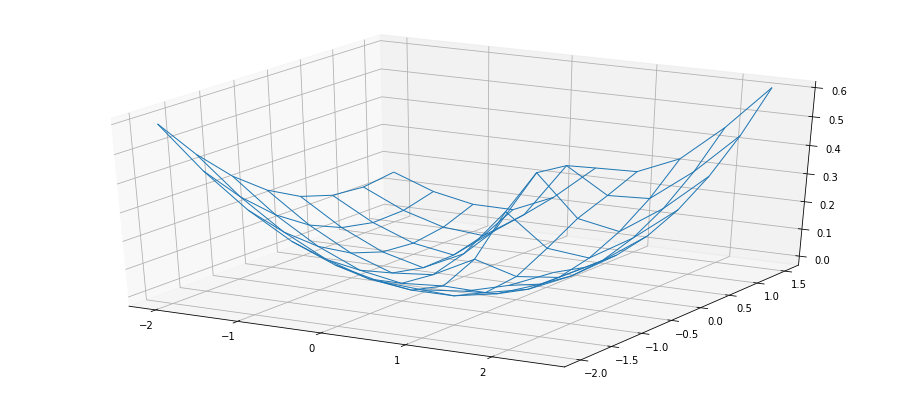

In [3]:
X_sparse, Y_sparse = np.meshgrid(range_x, range_y)
Z_sparse = func_z(X_sparse, Y_sparse)

# Implement wireframe plot for func_z
%matplotlib inline
plt.clf();
fig = plt.figure(figsize=(16, 7));
ax1 = fig.add_subplot(111,projection='3d');

ax1.plot_wireframe(X_sparse, Y_sparse, Z_sparse, linewidth=1);

For the rest of this task, we will be using 3D wireframe plot as the left `subplot` and a [contour plot](https://matplotlib.org/examples/pylab_examples/contour_demo.html) as the right `subplot` for visulization purposes.

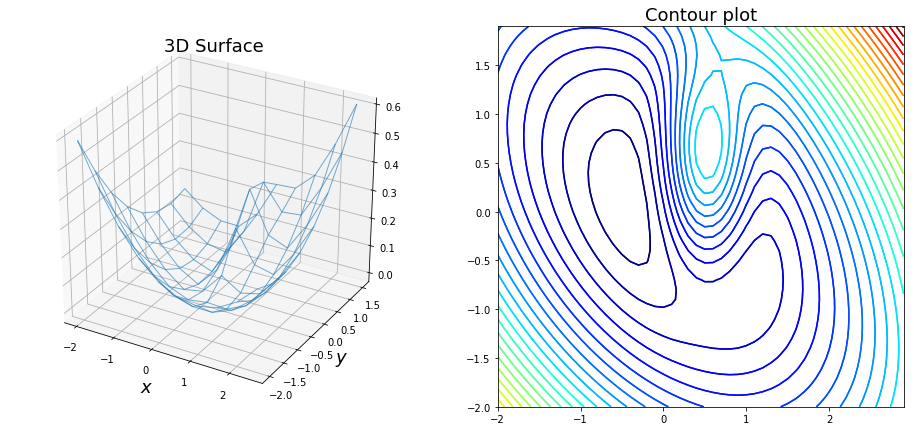

In [4]:
# x,y values for `Wireframe` plot
x_wireframe, y_wireframe = np.arange(-2.0, 3.0, 0.5), np.arange(-2.0, 2.0, 0.5)

# x,y values for `Contour` plot
x_contour, y_contour = np.arange(-2.0, 3.0, 0.1), np.arange(-2.0, 2.0, 0.1)

# Following code implements the plotting the Error Surface
X_sparse, Y_sparse = np.meshgrid(x_wireframe, y_wireframe)
Z_sparse = func_z(X_sparse, Y_sparse)

X_dense, Y_dense = np.meshgrid(x_contour, y_contour)
Z_dense = func_z(X_dense, Y_dense)

plt.clf()
fig = plt.figure(figsize=(16, 7))
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)

ax1.plot_wireframe(X_sparse, Y_sparse, Z_sparse, linewidth=1, cmap=cm.jet, zorder=1, alpha=0.6)
ax2.contour(X_dense, Y_dense, Z_dense, 32,  cmap=cm.jet)

ax1.set_xlabel(r'$x$',fontsize=18)
ax1.set_ylabel(r'$y$',fontsize=18)
ax1.set_title('3D Surface', fontsize=18)

ax2.contour(X_dense, Y_dense, Z_dense, 32,  cmap=cm.jet)
ax2.autoscale(False)
ax2.set_title('Contour plot', fontsize=18)

plt.show()

b) Next, implement the 3D Error Surface described above using tensorflow variables defined in the `problem_3d` function below. Write your code as specified by `# TODO` **(2 points)**

$$ term1 = \frac{2}{\sqrt{(2\pi \sigma_{1}^{2})^{2}}} * \exp{\left(- \left[ \frac{(x-\mu_1)^2}{(\frac{\sigma_{1}}{2})^2} + \frac{(y-\mu_1)^2}{(\sigma_1)^2}     \right] \right)} $$

$$ term2 = \frac{1}{\sqrt{(2\pi \sigma_{2}^{2})^{2}}} * \exp{\left(- \left[ \frac{(x-\mu_2)^2 + (y-\mu_2)^2}{(\sigma_2)^2} \right] \right)} $$

$$ term3 = \frac{1}{20} * \left(x^2  + xy + y^2 \right) $$ <br>

$$ z = term1 - term2 + term3 $$

In [5]:
# The following variables  will come in handy when implementing the error surface using tensorflow functions below
tf_x, tf_y, tf_z, = None, None, None
tf_reinit_x, tf_reinit_y = None, None
session = None

def problem_3d(start_x, start_y):
    global session
    global tf_x, tf_y, tf_z
    global tf_reinit_x, tf_reinit_y
    
    tf.reset_default_graph()
    session = tf.InteractiveSession()

    with tf.variable_scope('opt'):
        tf_x = tf.get_variable('x', initializer=tf.constant(start_x, shape=None, dtype=tf.float32))
        tf_y = tf.get_variable('y', initializer=tf.constant(start_y, shape=None, dtype=tf.float32))

    with tf.variable_scope('opt', reuse=True):
        tf_reinit_x = tf.assign(tf.get_variable('x'), start_x)
        tf_reinit_y = tf.assign(tf.get_variable('y'), start_y)
    
    # TODO Implement 3D error surface using the above defined variables
    sigma_1 = tf.constant(1.0, dtype=tf.float32)
    sigma_2 = tf.constant(2.0, dtype=tf.float32)
    mu_1 = tf.constant(0.5, dtype=tf.float32)
    mu_2 = tf.constant(0.0, dtype=tf.float32)
    pi = tf.constant(math.pi, dtype=tf.float32)
    c1 = tf.divide(2.0, tf.sqrt(tf.square(tf.multiply(2.0, tf.multiply(pi, tf.square(sigma_1))))))
    c2 = tf.divide(1.0, tf.sqrt(tf.square(tf.multiply(2.0, tf.multiply(pi, tf.square(sigma_2))))))
    e1 = tf.exp(-tf.add(tf.divide(tf.square(tf.subtract(tf_x,mu_1)),tf.square(tf.divide(sigma_1,2.0))),tf.divide(tf.square(tf.subtract(tf_y,mu_1)),tf.square(sigma_1))))
    e2 = tf.exp(-tf.add(tf.divide(tf.square(tf.subtract(tf_x,mu_2)),tf.square(sigma_2)),tf.divide(tf.square(tf.subtract(tf_y,mu_2)),tf.square(sigma_2))))
    term1 = tf.multiply(c1, e1)
    term2 = tf.multiply(c2, e2)
    term3 = tf.divide(tf.add(tf.add(tf.square(tf_x),tf.multiply(tf_x,tf_y)),tf.square(tf_y)),20.0)
    tf_z = term1 - term2 + term3

**Running and plotting Gradient Descent, [Gradient Descent with Momentum](https://www.tensorflow.org/api_docs/python/tf/train/MomentumOptimizer), [RMSProp](https://www.tensorflow.org/api_docs/python/tf/train/RMSPropOptimizer) and [AdaGrad](https://www.tensorflow.org/api_docs/python/tf/train/AdagradOptimizer)**

c) Fill code at `# TODO` to call the named optimizers below. The following code will plot the path taken by the minimization process from the starting point to minima. The plot will display this information in a single plot of 3D wireframe. **(2 points)**

In [6]:
# starting position
start_x, start_y = 0.55, 0.6
n_steps = 25

# Initialize the Error Surface related variables
problem_3d(start_x,start_y)

# Write code to call GD, Momentum, RMSProp and Adagrad implementations on tf_z global variable defined by problem_3d

with tf.variable_scope('gd'):
    # Call Gradient Descent Optimizer with learning rate = 0.1
    tf_optimize_z = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(tf_z)# TODO
with tf.variable_scope('momentum'):
    # Call Gradient Descent with Nestrov's Momentum Optimizer with learning rate = 0.1 and momentum = 0.9
    tf_mom_optimize_z = tf.train.MomentumOptimizer(learning_rate=0.1, momentum=0.9, use_nesterov=True).minimize(tf_z)# TODO
with tf.variable_scope('rmsprop'):
    # Call RMSProp with learning rate = 0.1
    tf_rms_optimize_z = tf.train.RMSPropOptimizer(learning_rate=0.1).minimize(tf_z)# TODO
with tf.variable_scope('adagrad'):
    # Call Adagrad Optimizer with learning rate = 0.1
    tf_ada_optimize_z = tf.train.AdagradOptimizer(learning_rate=0.1).minimize(tf_z)# TODO

session.run(tf.global_variables_initializer())

# Run vanilla GD on Error Surface
session.run([tf_reinit_x, tf_reinit_y])

opt_gd_points_x, opt_gd_points_y, opt_gd_points_z = [],[],[]
opt_gd_points_x.append(start_x)
opt_gd_points_y.append(start_y)
opt_gd_points_z.append(func_z(start_x,start_y))

print('Vanilla GD Optimization started')
for step in range(n_steps):
    session.run(tf_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_gd_points_x.append(x)
    opt_gd_points_y.append(y)
    opt_gd_points_z.append(z)


# Run Nestrov's Momentum GD on Error Surface
session.run([tf_reinit_x, tf_reinit_y])

opt_mom_points_x, opt_mom_points_y, opt_mom_points_z = [],[],[]
opt_mom_points_x.append(start_x)
opt_mom_points_y.append(start_y)
opt_mom_points_z.append(func_z(start_x,start_y))


print("Nesterov's Momentum Optimization started")
for step in range(n_steps):
    session.run(tf_mom_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_mom_points_x.append(x)
    opt_mom_points_y.append(y)
    opt_mom_points_z.append(z)
    
# RMSProp
session.run([tf_reinit_x, tf_reinit_y])

opt_rms_points_x, opt_rms_points_y, opt_rms_points_z = [],[],[]
opt_rms_points_x.append(start_x)
opt_rms_points_y.append(start_y)
opt_rms_points_z.append(func_z(start_x,start_y))

print('RMSProp Optimization started')
for step in range(n_steps):
    session.run(tf_rms_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_rms_points_x.append(x)
    opt_rms_points_y.append(y)
    opt_rms_points_z.append(z)

# Run AdaGrad on Error Surface
session.run([tf_reinit_x, tf_reinit_y])

opt_ada_points_x, opt_ada_points_y, opt_ada_points_z = [],[],[]
opt_ada_points_x.append(start_x)
opt_ada_points_y.append(start_y)
opt_ada_points_z.append(func_z(start_x,start_y))


print('Adagrad Optimization started')
for step in range(n_steps):
    session.run(tf_ada_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_ada_points_x.append(x)
    opt_ada_points_y.append(y)
    opt_ada_points_z.append(z)

    
range_x,range_y = np.arange(-1.0,2.0,0.2), np.arange(-2.0,2.0,0.2)
X_lowres, Y_lowres = np.meshgrid(range_x, range_y)
Z_lowres = func_z(X_lowres,Y_lowres)

range_x,range_y = np.arange(-1.0,2.0,0.1), np.arange(-2.0,2.0,0.1)
X_hires, Y_hires = np.meshgrid(range_x, range_y)
Z_hires = func_z(X_hires,Y_hires)

Vanilla GD Optimization started
Nesterov's Momentum Optimization started
RMSProp Optimization started
Adagrad Optimization started


Above optimizer outputs will be plotted in a single plot using the code below showing the path from the starting point to the minima. <br>

$\color{red}{Note}$: The plot will use the following colors for different optimizers.<br>
$\hspace{2em}$ SGD - $\color{blue}{blue}$<br>
$\hspace{2em}$ SGD with Nesterov's momentum - $\color{yellow}{yellow}$ <br>
$\hspace{2em}$ RMSProp - $\color{purple}{purple}$ <br>
$\hspace{2em}$ AdaGrad - $\color{green}{green}$ <br>


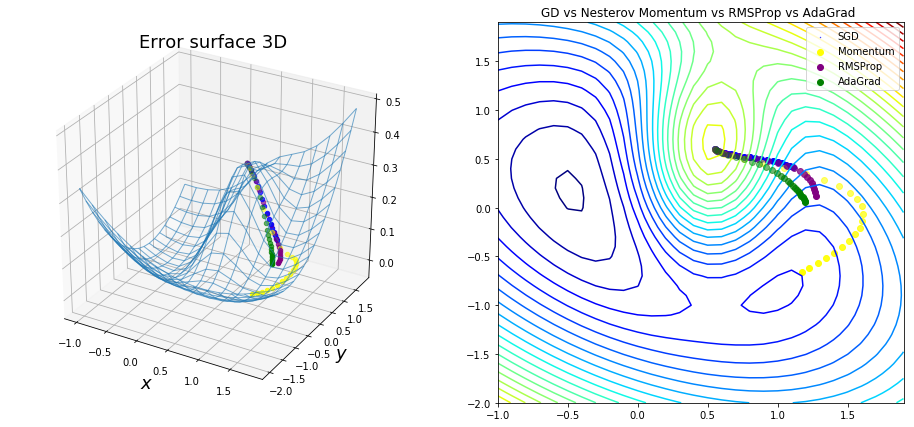

In [7]:
# Subplots visualizing the minimization steps

plt.clf()
fig = plt.figure(figsize=(16, 7))

epsilon = 0.0
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)

# plot
ax1.plot_wireframe(X_lowres, Y_lowres, Z_lowres, linewidth=1, cmap=cm.jet, zorder=1, alpha=0.6)
ax2.contour(X_hires, Y_hires, Z_hires, 32,  cmap=cm.jet)
ax2.autoscale(False)

# vanilla GD
for idx, (x,y,z) in enumerate(zip(opt_gd_points_x, opt_gd_points_y, opt_gd_points_z)):
    if idx != len(opt_gd_points_x)-1:
        ax1.scatter(x,y,z + epsilon , color='blue', alpha=(idx+10)/(n_steps+10.0), zorder=100)
        ax2.scatter(np.asarray(x),np.asarray(y) , color='blue')
    else:
        ax1.scatter(x,y,z + epsilon , color='blue', alpha=(idx+10)/(n_steps+10.0), label='SGD', zorder=100)
        ax2.scatter(x,y,z + epsilon , color='blue', label='SGD')

# GD with momentum
for idx, (x,y,z) in enumerate(zip(opt_mom_points_x, opt_mom_points_y, opt_mom_points_z)):
    if idx != len(opt_mom_points_x)-1:
        ax1.scatter(x,y,z + epsilon, color='yellow', alpha=(idx+10)/(n_steps+10.0), zorder=100)
        ax2.scatter(x,y , color='yellow', alpha=(idx+10)/(n_steps+10.0))
    else:
        ax1.scatter(x,y,z + epsilon , color='yellow', alpha=(idx+10)/(n_steps+10.0), label='Momentum', zorder=100)
        ax2.scatter(x,y, color='yellow', alpha=(idx+10)/(n_steps+10.0), label='Momentum')

# RMSProp
for idx, (x,y,z) in enumerate(zip(opt_rms_points_x, opt_rms_points_y, opt_rms_points_z)):
    if idx != len(opt_rms_points_x)-1:
        ax1.scatter(x,y,z + epsilon , color='purple', alpha=(idx+10)/(n_steps+10.0), zorder=100)
        ax2.scatter(x,y , color='purple', alpha=(idx+10)/(n_steps+10.0))
    else:
        ax1.scatter(x,y,z + epsilon , color='purple', alpha=(idx+10)/(n_steps+10.0), label='RMSProp', zorder=100)
        ax2.scatter(x,y, color='purple', alpha=(idx+10)/(n_steps+10.0), label='RMSProp')
        
# AdaGrad
for idx, (x,y,z) in enumerate(zip(opt_ada_points_x, opt_ada_points_y, opt_ada_points_z)):
    if idx != len(opt_ada_points_x)-1:
        ax1.scatter(x,y,z + epsilon , color='green', alpha=(idx+10)/(n_steps+10.0), zorder=100)
        ax2.scatter(x,y , color='green', alpha=(idx+10)/(n_steps+10.0), zorder=100)
    else:
        ax1.scatter(x,y,z + epsilon , color='green', alpha=(idx+10)/(n_steps+10.0), label='AdaGrad', zorder=100)
        ax2.scatter(x,y,color='green', alpha=(idx+10)/(n_steps+10.0), label='AdaGrad', zorder=100)

ax1.set_xlabel(r'$x$', fontsize=18)
ax1.set_ylabel(r'$y$', fontsize=18)
ax1.set_title("Error surface 3D", fontsize=18)
ax2.set_title('GD vs Nesterov Momentum vs RMSProp vs AdaGrad ', fontsize=12)
plt.legend()
plt.show()

d) Evaluate the function `z` at the termination points for each algorithm. Which algorithm has made better progress in minimizing `z`?. Explain. **(1 point)**

In [8]:
print("\nSGD:",opt_gd_points_z)
print("\nMomentum:",opt_mom_points_z)
print("\nRMSProp:",opt_rms_points_z)
print("\nAdaGrad:",opt_ada_points_z)


SGD: [0.3279163883810402, 0.32768443, 0.3273814, 0.3269757, 0.3264204, 0.32564628, 0.324552, 0.32299107, 0.32075638, 0.31756386, 0.31304246, 0.30674222, 0.2981816, 0.28695592, 0.27291197, 0.25633833, 0.2380572, 0.21929546, 0.20134422, 0.18519187, 0.17133927, 0.15984227, 0.15047532, 0.14289466, 0.13674577, 0.13171515]

Momentum: [0.3279163883810402, 0.32745057, 0.3263924, 0.32391322, 0.31787026, 0.30317938, 0.27050328, 0.21357372, 0.15144594, 0.11585222, 0.10629764, 0.10747327, 0.11038137, 0.11160816, 0.110209286, 0.10622542, 0.10009432, 0.09240938, 0.08380949, 0.07492137, 0.066322684, 0.058508657, 0.05185377, 0.046571735, 0.04269159, 0.040071715]

RMSProp: [0.3279163883810402, 0.32767108, 0.3273271, 0.3268235, 0.32605296, 0.32482362, 0.3227889, 0.31932655, 0.31335503, 0.30314788, 0.28645155, 0.26160592, 0.22993225, 0.19690782, 0.16878077, 0.14813127, 0.13395137, 0.124160096, 0.1170426, 0.11148763, 0.106834605, 0.10270271, 0.098875195, 0.095230386, 0.091702014, 0.08825632]

AdaGrad: [0

By looking at the termination point values of z for the 4 optimization algorithms, it is evident that the Momentum Optimizer minimized z the best. Momentum reduced z value to 0.04, compared to RMSProp (0.088), AdaGrad (0.084) and SGD (0.1317). Looking at the plots, we can clearly see that Momentum (yellow line) made the greatest strides to the minimum optimal region in the given number of steps. The reason was all the optimizers started off near the top of the hill region of the 3d error surface. Momentum, by its nature, was able to go down the slope of the hill the quickest due to it's accumulating velocity, and so could make better strides toward the optimal value.

**Points: 5.5/6**
> No plot for Adam optimizer

### Exercise 2. Edge Detection (10 points)

**Goal:** Study applying convolution to an image by choosing appropriate kernel and strides.

Below is a function (**edge_detector**) to help you apply a kernel as part of a convolution operation to an image (File dog.png, available on Piazza resource's page). Using this function, you will perform an edge detection on the given image. This image is also used to perform such an operation in Chapter 9 of Deep Learning Book (Fig 9.6 available in the **DL book** :http://www.deeplearningbook.org/contents/convnets.html). 

a) For this assignment you will implement the same kernel (denote as `kernel1` in code) as used in Fig. 9.6, with appropriate strides variable to obtain results similar to Fig 9.6 (also slide 11 from Chapter 8). To complete this task, fill in code at `# TODO`. The image dimensions should not change by more than 1 pixel. **(1 point)**

b) Then, use a new kernel (kernel2 = $\left( \begin{smallmatrix} 0& 1& 0\\ 1& -4& 1\\ 0& 1& 0\end{smallmatrix} \right)$) with appropriate strides with the same function below. Comment on any differences you see between the results obtained using `kernel1` and `kernel2`. **(1.5 points)**

c) For the two kernels and the given image, calculate the number of operations performed to convolve the repsective kernel and the image (refer Fig 9.6 from **DL book**) . **(2 points)**

d) Next, copy the function `edge_detector` into `edge_detector2` and then implement a max pooling operation (with strides 2) on top of the convolution operation in the `edge_dectector` function and plot edge_detection result for `kernel1`. Use a pool size of 3 while pooling only the along the y axis. **(2 points)**

e) Without the max pooling layer, increase the strides for kernel1 to obtain an image size which is different from the result in d) by atmost one pixel in different dimensions. **(1.5 points)**

f) Elaborate on the differences between procedures followed by d) & e). Which one would you prefer and why? **(2 points)**

Note: For this assignment, you will need to install tensorflow and Pillow (do not install package named PIL) to work with the following code. Also, we will be working with a gray image converted to have one input and one output channel.

Original Image Shape:  (218, 250)


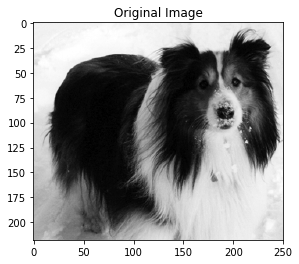

Applying Kernel 1
(1, 218, 249, 1)


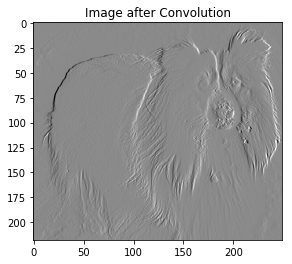

Applying Kernel 2
(1, 216, 248, 1)


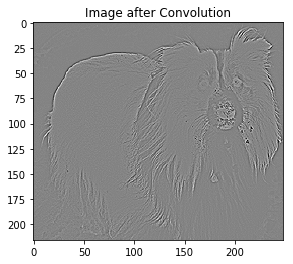

Applying Kernel 1 with maxpool
(1, 108, 125, 1)


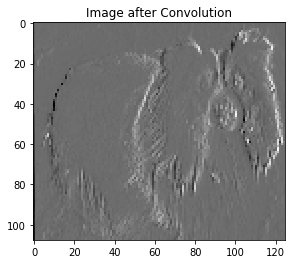

Applying Kernel 1 with increased strides
(1, 109, 125, 1)


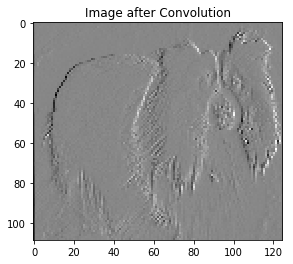

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

img = Image.open('dog.png')
img = img.convert('L', (0.2989, 0.5870, 0.1140, 0)) # convert to gray scale
img = np.asarray(img, dtype='float32')
print('Original Image Shape: ',img.shape)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

def edge_detector(img, kernel, strides):
    with tf.Graph().as_default():
                
        # reshape image to conform with conv2d requirements
        img_shape = img.shape
        img_conv = img.reshape(1, img_shape[0], img_shape[1], 1)
        x = tf.placeholder('float32', [1, None, None, 1])
        k = tf.get_variable('k', initializer=tf.to_float(kernel))
        
        # apply convolution
        conv = tf.nn.conv2d(x, k, strides=strides, padding='VALID')
        
        # Implement Max pooling layer
        # TODO        
        
        init = tf.global_variables_initializer()    
        with tf.Session() as session:
            session.run(init)
            conv_op = session.run(conv, feed_dict={x: img_conv})
            plt.imshow(conv_op[0, :, :, 0], cmap='gray')
            print (conv_op.shape)
            plt.title('Image after Convolution')
            plt.show()

def edge_detector2(img, kernel, strides, pool_size, pool_strides):
    with tf.Graph().as_default():
                
        # reshape image to conform with conv2d requirements
        img_shape2 = img.shape
        img_conv2 = img.reshape(1, img_shape2[0], img_shape2[1], 1)
        x2 = tf.placeholder('float32', [1, None, None, 1])
        k2 = tf.get_variable('k2', initializer=tf.to_float(kernel))
        
        # apply convolution
        conv2 = tf.nn.conv2d(x2, k2, strides=strides, padding='VALID')
        
        # Implement Max pooling layer
        # TODO        
        maxpool2 = tf.nn.max_pool(conv2,pool_size,strides=pool_strides,padding='VALID')
        
        init2 = tf.global_variables_initializer()    
        with tf.Session() as session2:
            session2.run(init2)
            conv_op = session2.run(maxpool2, feed_dict={x2: img_conv2})
            plt.imshow(conv_op[0, :, :, 0], cmap='gray')
            print (conv_op.shape)
            plt.title('Image after Convolution')
            plt.show()
# Implement kernel1 and store respective strides to strides1
# TODO
kernel1 = np.array([-1,1],dtype='float32')
kernel1 = np.reshape(kernel1,(1,2,1,1))
strides1 = [1,1,1,1]
print('Applying Kernel 1')
edge_detector(img,kernel1,strides1)

# Implement kernel2 and store respective strides to strides2
# TODO
kernel2 = np.array([[0,1,0],[1,-4,1],[0,1,0]],dtype='float32')
kernel2 = np.reshape(kernel2,(3,3,1,1))
strides2 = [1,1,1,1]
print('Applying Kernel 2')
edge_detector(img,kernel2,strides2)

# Implementing kernel1 and maxpool op
pool_size = [1,3,1,1]
pool_strides = [1,2,2,1]
print('Applying Kernel 1 with maxpool')
edge_detector2(img,kernel1,strides1,pool_size,pool_strides)

# Replicating maxpool behavior by changing strides
strides1 = [1,2,2,1]
print('Applying Kernel 1 with increased strides')
edge_detector(img,kernel1,strides1)

**Answer b)**<br>
When we use kernel1 we get the output image of size 218x249, which means the height remains same whereas the width reduces by 1 pixel. But, when we use kernel2, the output is of dimension 216x248, which tells us that we lost 2 pixels in the height and 2 pixels in the width with respect to the input image. Also, if we use kernel2, we can see that the network actually predicts the horizontal edges better (as can be seen near the dog's back in the image). Kernel1 could predict the vertical edges mostly.

**Answer c)**<br>
When we use kernel1, we have $$ 218 * 249 * (2 + 1) = 162,846 $$ 
<br>floating point operations, considering the output dimension, and the fact that we have two multiplications and one addition as the operations that the kernel performs *per output pixel*.<br>
For kernel2, we have $$ 216 * 248 * (9 + 8) = 910,656$$
<br>floating point operations, considering the different output dimension and that our kernel2 is 3x3, so 9 multiplications and 8 additions.<br>
However, as only 5 terms are non-zero in the kernel, if we only consider the non-zero kernel terms in the sparse kernel, we have $$ 216 * 248 * (5 + 4) = 482,112 $$
<br>floating point operations, for 5 multiplications and 4 additions.

**Answer f)**<br>
The methods used in d and e are different, and they produce slightly different results. While both of them reduce the dimensionality, the maxpool operation reduces the height by one more pixel compared to the higher strides implementation of e.<br>
In the maxpool implementation, we have a convolutional layer, which uses a filter and does strides of 1. Then it uses maxpooling with strides of 2, and a size of 3x3. But in the implementation without the maxpool, we simply increment the strides of the convolutional layer from 1 to 2. In the maxpool implementation, we had more information after the convolution layer, because of stride of 1, but then we summarized and compressed that data using the maxpool. But in the implementation without the maxpool, we automatically use a higher stride, which directly leads to more loss of information at the convolution. Hence, generally I would prefer to use the maxpool, as it generates more information after the pass through convolution, and then uses maxpool to summarize on that information, rather than directly losing information after the strides of the convolution layer. But as seen in this example, there is no difference between the output of the maxpool and the convolution with increased strides. And when the computation time is taken into account, the computation via convolution with increased strides takes much less computational effort, therefore, for this example, it is the method of choice.

**Points: 10/10**
> None

### Exercise 3. Convolution in Neural Networks: Theory (4 points)

**Goal:** To answer the following question with True (T) and False (F) with **justification**.

Following are statements that you should answer with either a True or a False. And, also provide a justification as to why you think so. To answer these questions, you will need to revisit the lecture slides and read the chapter 9 of the Deep learning book: [ConvNets](http://www.deeplearningbook.org/contents/convnets.html).

a) Pooling needs to be removed for handling inputs of varying size. \[T/F\] **(1 point)**

b) Given a multilayered convolution neural network, a cell in a second convolutional layer has the same-sized receptive field as a cell in the first convolutional layer. \[T/F\] **(1 point)**

c) In the context of edge detection, a convolutional neural network learns features for each pixel separately. \[T/F\] **(1 point)**

d) There is an exponential increase in kernel parameters when convolutional net's capabilities are increased to handle transformations like rotation, scaling etc. \[T/F\] **(1 point)**

<br>**Answer a.** *False*. Pooling is actually essential for handling inputs of varying size. If we want to classify images of variable size, the input to the classiﬁcation layer of our network must always have a ﬁxed size. This is usually accomplished by varying the size of an oﬀset between pooling regions so that the classiﬁcation layer always receives the same number of summary statistics regardless of the input size. 
<br>**Answer b.** *False*. The receptive ﬁeld of the units in the deeper layers of a convolutional network is larger than the receptive ﬁeld of the units in the shallow layers. This eﬀect increases if the network includes architectural features like strided convolution or pooling. This effectively means that even though direct connections in a convolutional net are very sparse, units in the deeper layers can indeed be indirectly connected to all or most of the input image. Hence, a convolutional network can actually learn features from different parts of an image very effectively. Consider we have two convolution layers one after the other after the input image layer. If one unit of the deep layer, here the second layer is connected to 3 units of the first convolutional layer (depending on the field size obviously), then in turn, it is connected to 5 units of the input layer (considering the first layer also had a 3 unit field size), making the receptive field 5 of the second layer, whereas it is 3 for the first layer.
<br>**Answer c.** *False*. For edge detection, a convolution neural network does not learn features for each pixel separately. This is because we apply a fixed kernel matrix throughout the input image space, so we basically learn a fixed number of features depending on the kernel size and stride. The reason for this is parameter sharing. This allows us to detect similar features as similar edges anywhere in the picture. So, it is not dependent on each pixel separately.
<br>**Answer d.** *True*. Take for example the picture from the slides, where different rotated „fives“ should be recognised as „five“.  For each rotation, we have to use three different learned filters. The filters are based on different parameter sets. Then we use maxpool on each of these diferent learned filters so as to predict 5 no matter which way the picture is rotated.<br>
If we now think of an arbitrary rotation of the image, this really results in an exponential increase in kernel parameters.

**Points: 4/4**

### Total Points: 19.5/20. Well done!

---

## Submission instructions
You should provide a single Jupyter notebook as the solution. The naming should include the assignment number and matriculation IDs of all members in your team in the following format:
**assignment-9_matriculation1_matriculation2_matriculation3.ipynb** (in case of 3 members in a team). 
Make sure to keep the order matriculation1_matriculation2_matriculation3 the same for all assignments.

Please submit the solution to your tutor (with **[NNIA][assignment-9]** in email subject):
1. Maksym Andriushchenko <s8mmandr@stud.uni-saarland.de>
2. Marius Mosbach <s9msmosb@stud.uni-saarland.de>
3. Rajarshi Biswas <rbisw17@gmail.com>
4. Marimuthu Kalimuthu <s8makali@stud.uni-saarland.de>

Note :  **If you are in a team, you should submit only 1 solution to only 1 tutor.** <br>
$\hspace{2em}$ **Submissions violating these rules will not be graded.**